# Model Evaluation and Performance Analysis

1. **Setup and Imports**: Import necessary libraries for model evaluation and visualization.
2. **Model and Data Configuration**: Define paths to test images and load the trained model.
3. **Helper Function**: A function to check if any plants are detected in the inference results.
4. **Evaluation Process**: Iterate through images, make predictions, and collect true labels.
5. **Confusion Matrix Calculation**: Compute the confusion matrix to summarize prediction results.
6. **Results Visualization**: Visualize the confusion matrix for better understanding of model performance.


In [1]:
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import patches
import ultralytics

from IPython import display
from IPython.display import Image
display.clear_output()

import ultralytics
from ultralytics import YOLO
ultralytics.checks()


Ultralytics YOLOv8.2.48  Python-3.11.8 torch-2.3.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
Setup complete  (8 CPUs, 15.6 GB RAM, 332.9/476.1 GB disk)


In [ ]:
# Path to the image directory
image_dir = 'Test/Yes'



# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]



images = []
for image in image_files:
    image_path = image_dir + '/' + image
    images.append(image_path)

# Load a model
model = ultralytics.YOLO('tuned50.pt')

# Run batched inference on a list of images
results = model(images)



In [2]:
def has_plant(result):
    # Get the bounding boxes, classes, names, and confidences
    boxes = results[0].boxes.xyxy.tolist()
    classes = results[0].boxes.cls.tolist()
    names = results[0].names
    confidences = results[0].boxes.conf.tolist()

    # Count the number of plants
    num_plants = classes.count(0)  # Assuming 'plant' is class 0
    
    if num_plants > 0:
        return True
    else:
        return False


In [3]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from ultralytics import YOLO

tn, fp, fn, tp = 0,0,0,0
# Set paths
test_dir = 'Test'
yes_dir = os.path.join(test_dir, 'Yes')
no_dir = os.path.join(test_dir, 'No')

# Load the model
model = YOLO('v2.pt')  # Replace 'best.pt' with your model path

# Create empty lists to store predictions and true labels
predictions = []
true_labels = []

# Iterate over the Yes folder
for filename in os.listdir(yes_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(yes_dir, filename)
        results = model(image_path)

        # Check if any detections were made
        if has_plant(results):
            predictions.append(1)  # 'Yes' class (since there's a detection)
        else:
            predictions.append(0)  # 'No' class (no detection)
        true_labels.append(1)  # True label is 'Yes' for this folder

# Iterate over the No folder
for filename in os.listdir(no_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_path = os.path.join(no_dir, filename)
        results = model(image_path)

        # Check if any detections were made
        if has_plant(results):
            predictions.append(1)  # 'Yes' class (since there's a detection)
        else:
            predictions.append(0)  # 'No' class (no detection)
        true_labels.append(0)  # True label is 'No' for this folder

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predictions, labels=[0, 1])

# Extract confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Print confusion matrix values
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Print the predicted and true labels arrays for debugging
print("Predictions:", predictions)
print("True Labels:", true_labels)


image 1/1 c:\Users\User\Desktop\DrMProj\Test\Yes\No_Right_lat_38.968649_lng_-121.847986_CamDir_37.6603.jpg: 640x640 3 plants, 2065.0ms
Speed: 3.0ms preprocess, 2065.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\User\Desktop\DrMProj\Test\Yes\Yes_Left_lat_36.278654_lng_-119.372652_CamDir_242.308.jpg: 640x640 5 plants, 2685.8ms
Speed: 4.0ms preprocess, 2685.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\User\Desktop\DrMProj\Test\Yes\Yes_Left_lat_45.217383999999995581_lng_-122.77694200000000535_CamDir_277.27.jpg: 640x640 2 plants, 2388.7ms
Speed: 9.5ms preprocess, 2388.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\User\Desktop\DrMProj\Test\Yes\Yes_Left_lat_45.435994000000000881_lng_-122.34845600000001298_CamDir_225.162.jpg: 640x640 2 plants, 2232.8ms
Speed: 7.1ms preprocess, 2232.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\U

True Negatives: 311
False Positives: 89
False Negatives: 3
True Positives: 20


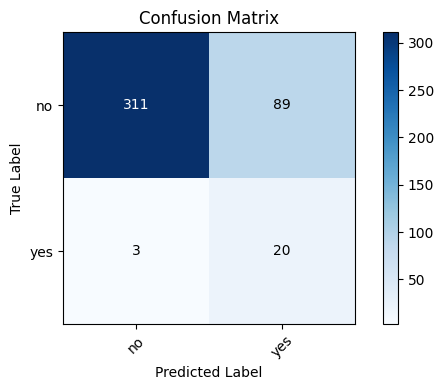

In [5]:
# Extract confusion matrix values
tn, fp, fn, tp = 311, 89, 3, 20

# Print confusion matrix values
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

class_names = ["no", "yes"] 

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels and annotations
tick_marks = np.arange(len(class_names))  # Assuming class_names is defined
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()